In [23]:
import os

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%load_ext autoreload
%autoreload 2
import refresh_ergast
import ergast_loader
import data_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# refresh_ergast.refresh()
ergast = ergast_loader.ErgastLoader('data//ergast_data')

Wall time: 626 ms


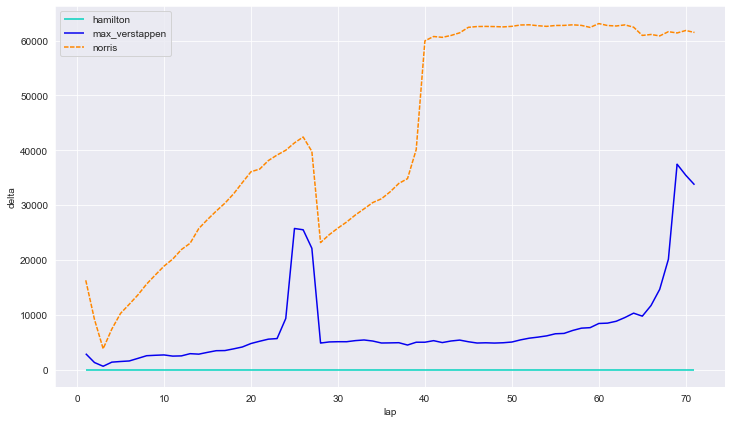

In [48]:
%%time
raceId = 1032
delta_table = data_tools.make_delta_table(
    ergast,
    raceId=raceId, # 2020 austria 1
    tgt_driver='hamilton',
    driver_refs=['hamilton', 'max_verstappen', 'norris'],    
)

fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(
    data=delta_table,
    x='lap',
    y='delta',
    hue='driverRef',
    palette=data_tools.get_driver_color_dict(ergast, raceId, key='ref'),
    style='driverRef',
    dashes={'hamilton': (1,0), 'max_verstappen': (1, 0), 'norris': (3,1)},
    ax=ax)
# seaborn specific remove legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

In [39]:
type(ergast.data['drivers'].code.unique())

D:\home\projects\f1-analysis\f1-analysis\data_tools.py:117: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  driver_ids = list(driver_ids)


numpy.ndarray